# # 13. 특잇값 분해

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib_inline.backend_inline
plt.rcParams.update({'font.size':14})

<br>


## 13.01. SVD 개요


- **SVD의 목적은 하나의 행렬을 왼쪽 특이벡터 ($U$), 특잇값 ($\Sigma$), 오른쪽 특이벡터 ($V$)라고 하는 세 행렬의 곱으로 분해하는 것**

<br>

- **SVD는 고윳값 분해를 정방이 아닌 행렬까지 확대해서 일반화한 것**

    **또는 반대로 고윳값 분해를 SVD의 정방 행렬에 대한 특수한 경우로 간주할 수 있음**
    
    **(모든 정방 행렬에 대해서 SVD와 고윳값 분해와 동일하지 않음)**

$$A = U \Sigma V^T$$

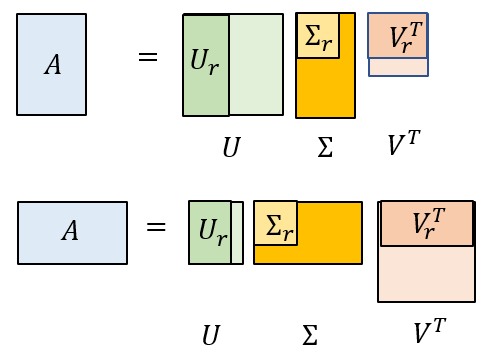

<br>

### SVD의 주요 특징

- **$A$가 정방이 아니어도 $U$와 $V$는 모두 정방 행렬**

<br>

- **특이벡터 $U$와 $V$는 직교 행렬이므로 $U^T U = I,\;\;V^T V=I$**

    **각 열은 다른 열과 직교하고 임의의 열로 이루어진 부분 집ㅇ합은 나머지 (겹치지 않는)열로 이루어진 부분 집합과 직교**
    
<br>

- **$U$의 처음 $r$개 열은 행렬 $A$의 열공간에 대한 직교 기저벡터를 나타내며, 나머지 열은 왼쪽 영공간에 대한 직교 기저벡터를 나타냄**
    
    **(단, $r=M$이라면 행렬은 최대열계수이고 왼쪽 영공간은 비어 있음)**
    
<br>

- **$V^T$의 처음 $r$개 행 ($V$의 열)은 행공간에 대한 직교 기저벡터를 나타내며 나머지 행은 영공간에 대한 직교 기저벡터를 나타냄**

<br>

- **특잇값 행렬은 $A$와 같은 크기의 대각 행렬이며, 특잇값은 항상 가장 큰 값 (왼쪽 위)부터 가장 작은 값 (오른쪽 아래) 순서대로 정렬됨**
    
<br>

- **모든 특잇값은 음수가 아닌 실수. 행렬에 복소숫값이 포함되어 있어도 특잇값이 복소수나 음수가 될 수 업음**
    
<br>

- **0이 아닌 특잇값의 수는 행렬의 계수와 같음**

<br>

- **열공간과 왼쪽 영공간은 $U$의 처음 $r$개의 열과 나머지 $M-r$개의 열로 생성되며,**

    **행공간과 영공간은 $V^T$의 처음 $r$개의 행과 나머지 $N-r$개의 행으로 생성**
    
    **비정방 행렬에서 $r=M$이면 왼쪽 영공간은 비어 있고, $r=N$이면 영공간은 비어 있음**

<br>

### 특잇값과 행렬의 계수
- **행렬의 계수는 0이 아닌 특잇값의 수로 결정됨**


<br>

### SVD
#### `np.linalg.svd()`


In [3]:
A = np.random.randn(4,6)

- $U$, $\Sigma$값을 가진 벡터, $V^T$ 계산

In [4]:
U, s, Vt = np.linalg.svd(A)

- $\Sigma$값을 가진 벡터 $\rightarrow$ $\Sigma$로 변환

In [7]:
S = np.zeros(np.shape(A))
np.fill_diagonal(S, s)

- $U$, $\Sigma$, $V$

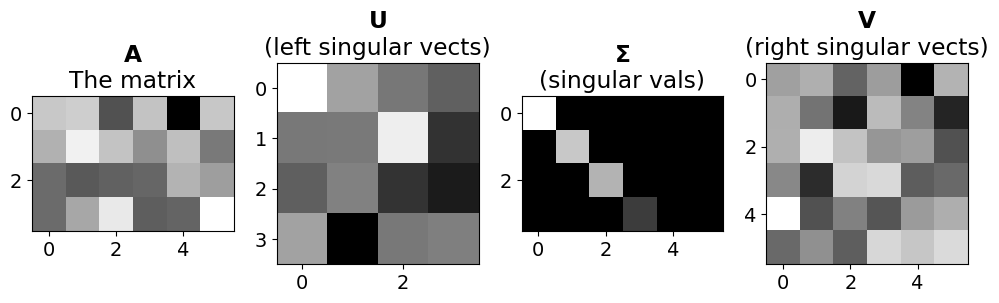

In [22]:
_,axs = plt.subplots(1,4,figsize=(10,6))

axs[0].imshow(A,cmap='gray',aspect='equal')
axs[0].set_title('$\mathbf{A}$\nThe matrix')

axs[1].imshow(U,cmap='gray',aspect='equal')
axs[1].set_title('$\mathbf{U}$\n(left singular vects)')

axs[2].imshow(S,cmap='gray',aspect='equal')
axs[2].set_title('$\mathbf{\Sigma}$\n(singular vals)')

axs[3].imshow(Vt,cmap='gray',aspect='equal')
axs[3].set_title('$\mathbf{V}$\n(right singular vects)')

plt.tight_layout()
plt.show()

<br>

##  13.03. 행렬의 SVD와 계수-1 '계층'

#### 행렬 SVD 방정식 $A=U\Sigma V^T$은 하나의 벡터에 대해, 아래와 같이 표현 가능

$$Av =  u \sigma$$

$$u^T A = \sigma v^T$$

<br>

- $u$는 $A$의 열공간에 존재하며, $v$는 열들을 결합하는 가중치
- $v$는 $A$의 행공간에 존재하며, $u$는 행들을 결합하는 가중치 

<br>

#### 하나의 벡터에 대하여
- **$1$번째 특이벡터와, $1$번째 (가장 큰) 특잇값을 사용하여**

    **$$u_1 \sigma_1 v^T_1 = A_1$$이며, $A_1$은 원래 행렬과 같은 크기의 외적 $\rightarrow$ 계수-1 행렬**
    
    **$\rightarrow$ 행렬에서 가장 중요한 '계층' (가장 큰 특잇값을 가지고 있기 때문)**
    
    <br>

    **따라서 $\sigma>0$와 고나련된 모든 SVD 계층을 합산하여, 원래 행렬을 재구성 할 수 있음**

    $$A = \sum^r_{i=1}u_i \sigma_i v^T_i$$
    
    <br>
    
    - **모든 $r$을 사용하여 계산할 필요는 없으며, $k < r$계층을 포함하는 다른 행렬을 재구성할 수 있음 $\rightarrow$ $\tilde{A}$**
    
        **$\rightarrow$ 행렬 $A$의 낮은 계수 근사치 (low-rank approximation, 계수-$k$ 근사치)**
    

<br>

## 13.04. 고윳값 분해와 특잇값 분해

<br>

### 특잇값과 특이벡터 도출

<br>

#### 왼쪽 특이벡터

$$A A^T = (U\Sigma V^T)(U \Sigma V^T)^T$$

$$= U \Sigma V^T V \Sigma^T U^T$$

$$= U \Sigma^2 U^T$$

$$\rightarrow AA^T U = U \Sigma^2$$

- $AA^T$의 고유벡터는 $A$의 왼쪽 특이벡터 $U$이고, $AA^T$의 고윳값은 $\Sigma^2$

<br>

#### 오른쪽 특잇값

$$A^TA = (U\Sigma V^T)^T(U\Sigma V^T)$$

$$= V\Sigma^T U^T U \Sigma V^T$$

$$=V\Sigma^2 V^T$$

$$\rightarrow A^TA V = V \Sigma^2$$

- $A^TA$의 고유벡터는 $V$, $A^TA$의 고윳값은 $\Sigma^2$

<br>

### $A^TA 의 SVD$ (대칭행렬)
- **대칭행렬 $S=A^TA$에 대해서, 왼쪽과 오른쪽 특이벡터는 동일**

$$S = U\Sigma V^T = V\Sigma U^T = U \Sigma U^T = V\Sigma V^T$$

<br>

- **대칭 행렬의 경우 특잇값과 고윳값이 동일**

In [10]:
A = np.random.randn(5,5)
A = A.T@A
A

array([[ 1.12549239, -0.74518916, -0.34630767,  0.98205895, -0.99662497],
       [-0.74518916,  2.76111249, -2.80611919, -2.26638692, -0.26652588],
       [-0.34630767, -2.80611919,  5.42410871,  0.6827456 , -0.03082633],
       [ 0.98205895, -2.26638692,  0.6827456 ,  3.24400262,  0.70402016],
       [-0.99662497, -0.26652588, -0.03082633,  0.70402016,  6.11466718]])

In [12]:
evals, evecs = np.linalg.eig(A)
sinvals = np.linalg.svd(A)[1]

print(np.sort(evals))
print(np.sort(sinvals))

[1.63231390e-03 4.60670497e-01 3.85049327e+00 6.31664751e+00
 8.03993978e+00]
[1.63231390e-03 4.60670497e-01 3.85049327e+00 6.31664751e+00
 8.03993978e+00]


<br>

###  특잇값의 분산 변화과 설명

<br>

#### **특잇값의 합은 행렬의 분산의 총량**
- **특이벡터가 단위 크기로 정규화되어 크기정보를 제공하지 않음**

    **특이벡터는 방향을 가리키고, 특잇값은 얼마나 멀리 있는지를 나타냄**

    - **또한 특이벡터는 직교행렬로, 벡터를 회전시키지만 크기를 조정하지 않음**
    
        **(즉, 특이벡터를 곱한 후에도 벡터의 크기는 그대로 유지 $||Uw|| = ||w||$)**

<br>

- *$||Uw|| = ||w|| $*

In [19]:
U, s, Vt = np.linalg.svd(np.random.randn(5,5))
w = np.random.randn(5,1)

# print out the norms
print( np.linalg.norm(U@w) )
print( np.linalg.norm(  w) )

4.616920212951791
4.616920212951791


<br>

#### 특잇값의 정규화
- **원시 특잇값은 행렬의 수치 척도로 표시 (데이터에 스칼라를 곱하면, 특이값이 증가)**

    $\rightarrow$ 특잇값은 해석하기 어렵고, 기본적으로 **서로 다른 데이터 집합 간에 비교가 불가능**

    **$\rightarrow$ 특잇값을 설명된 총 분산 비율로 변환하는 것이 유용**

    $\rightarrow$ **특잇값 $i$는 다음과 같이 정규화**
    
    $$\tilde{\sigma_i} = \frac{100 \sigma_i}{\sum \sigma}$$
    
    <br>
    
    - **특잇값 사이의 상대적 거리에는 영향을 미치지 않으며, 수치 척도를 쉽게 해석할 수 있도록만 변경**

<br>

#### Scree Plot예시

- 무작위 숫자를 평활화하여 만든 $30 \times 40$ 무작위 행렬
    
    (2차원 가우스와 무작위 숫자 사이의 2차원 합성곱으로 구현)

In [34]:
m = 40
n = 30

In [35]:
k = int((m+n)/4)
X, Y = np.meshgrid(np.linspace(-3, 3, k),np.linspace(-3, 3, k))
g2d = np.exp( -(X**2 + Y**2)/(k/8) )

In [36]:
from scipy.signal import convolve2d
A = convolve2d(np.random.randn(m,n), g2d, mode='same')

In [37]:
A.shape

(40, 30)

- $U$, $\Sigma$, $V^T$

In [38]:
U, s, Vt = np.linalg.svd(A)
S = np.zeros(np.shape(A))
np.fill_diagonal(S,s)

In [41]:
print(U.shape)
print(s.shape)
print(Vt.shape)
print(S.shape)

(40, 40)
(30,)
(30, 30)
(40, 30)


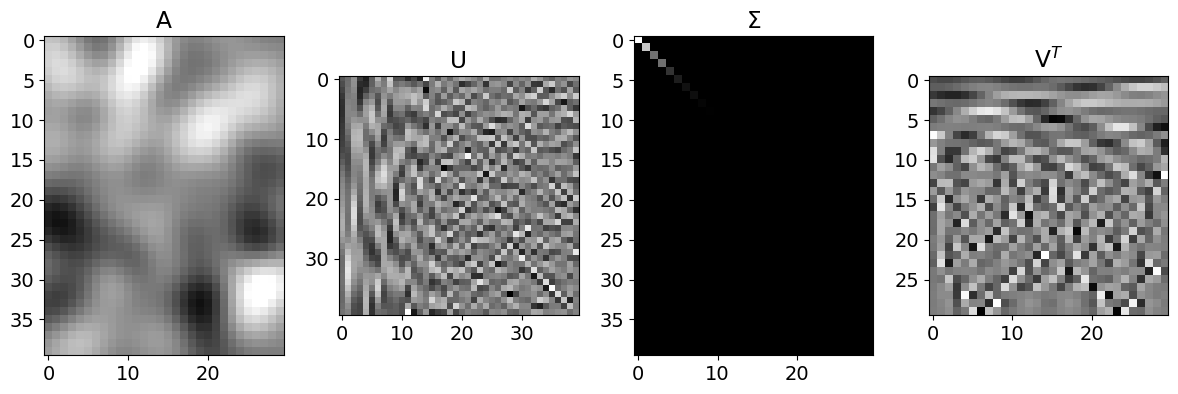

In [39]:
_,axs = plt.subplots(1,4,figsize=(12,6))

axs[0].imshow(A, aspect='equal', cmap='gray', vmin=-10,vmax=10)
axs[0].set_title('A')

axs[1].imshow(U, aspect='equal', cmap='gray')
axs[1].set_title('U')

axs[2].imshow(S, aspect='equal', cmap='gray')
axs[2].set_title('$\Sigma$')

axs[3].imshow(Vt, aspect='equal', cmap='gray')
axs[3].set_title('V$^T$')

plt.tight_layout()
plt.show()


- 특잇값 정규화  $\tilde{\sigma_i} = \frac{100 \sigma_i}{\sum \sigma}$ (Scree plot)


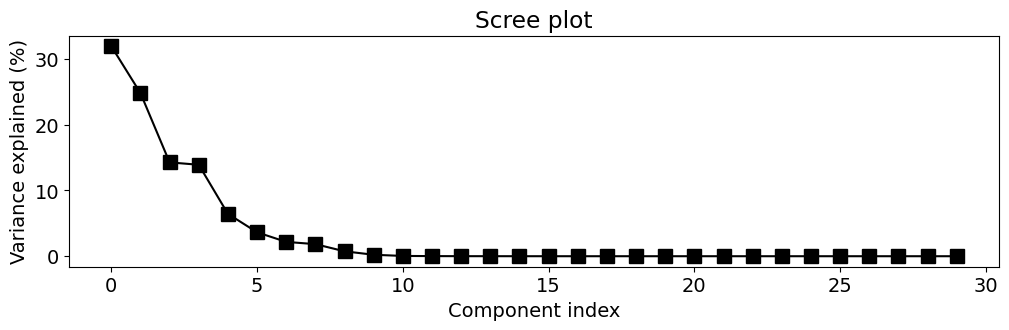

In [40]:
plt.figure(figsize=(12,3))
plt.plot(100*s/np.sum(s), 'ks-', markersize=10)
plt.xlabel('Component index')
plt.ylabel('Variance explained (%)')
plt.title('Scree plot')
plt.show()

- 30개의 층 중 4개의 층을 추가하는 것으로 결정
    
    - 각 4개의 층과, 4개 층의 누적 형태 확인

In [43]:
numLayers = 4
rank1mats = np.zeros((numLayers,m,n))

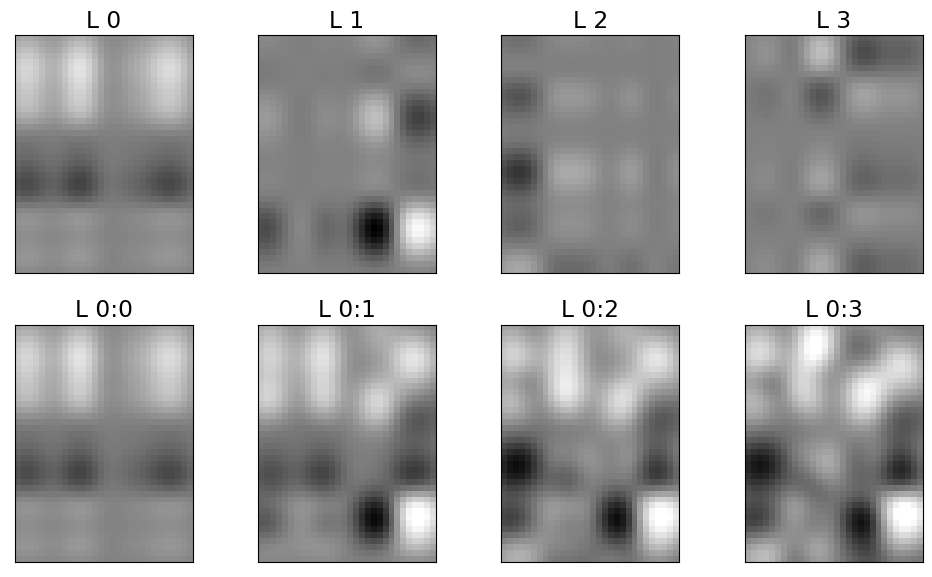

In [44]:
_,axs = plt.subplots(2,numLayers,figsize=(10,6))

for i in range(numLayers):
    
    rank1mats[i,:,:] = np.outer(U[:,i],Vt[i,:])*S[i,i]
    
    axs[0,i].imshow(rank1mats[i,:,:],cmap='gray', vmin=-10,vmax=10)
    axs[0,i].set_title(f'L {i}')
    axs[0,i].set_xticks([]), axs[0,i].set_yticks([])

    axs[1,i].imshow(np.sum(rank1mats[:i+1,:,:],axis=0),cmap='gray', vmin=-10,vmax=10)
    axs[1,i].set_title(f'L 0:{i}')
    axs[1,i].set_xticks([]), axs[1,i].set_yticks([])


plt.tight_layout()
plt.show()

<br>

### 행렬의 조건수
- **행렬의 조건수는 가장 큰 값과 가장 작은 특잇값의 비율로 정의**

$$\kappa = \frac{\sigma_{max}}{\sigma_{min}}$$

<br>

- 조건수가 큰 최대계수 행렬은 불안정할 수 있음
    - **이론적으는 가역적이지만, 실제로는 역행렬이 불안정 $\rightarrow$ 나쁜 조건 행렬 (ill conditioned matrix)**
        
        **$\rightarrow$ 조건수가 증가함에 따라 행렬은 특이 행렬이 되는 경향이 있음**
        
        **$\rightarrow$ 나쁜 조건 행렬은 '거의 특이 행렬'이며, 그 역행렬은 수치 오류의 위험이 증가**

<br>

## SVD와 MP 의사역행렬
- 행렬이 정방이고 가역이라고 가정하면

$$A^{-1} = (U \Sigma V^T)^{-1}$$

$$= V \Sigma^{-1} U^{-1}$$

$$= V \Sigma^{-1} U^T$$

- $U^{-1}=U^T$이므로, $\Sigma$의 역행렬만 안다면, 역행렬을 계산 가능

    **$\Sigma$는 대각 행렬이기 때문에, 각 대각원소를 뒤집기만 하면, $\Sigma^{-1}$을 계산**
    
    하지만, 이는 수치적 불안정이 존재
    
    $$\downarrow$$
    
    **의사역행렬 (단위 행렬에 가깝게 만드는 행렬) 사용**
    
    - **모든 대각 요소를 반전하는 대신 $\Sigma$에서 0이 아닌 대각 요소를 반전**
    
    $$V\Sigma^{+} U^T$$

<br>

#### 높은 최대계수 행렬 ($6\times 4$)예시
- 높은 최대계수 행렬 $(A^TA)^{-1} A^T$의 명시적 왼쪽 역행렬

In [53]:
A = np.random.randn(6,4)

In [54]:
Linv = np.linalg.inv(A.T@A)@A.T

-  $A$의 의사역행렬과의 비교

In [56]:
Apinv = np.linalg.pinv(A)

In [55]:
print(np.round( Linv - Apinv ,5))

[[ 0. -0.  0.  0. -0.  0.]
 [-0. -0. -0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -0.]
 [ 0. -0. -0.  0. -0.  0.]]


<br>

#### 넓은 최대계수 행렬 ($4 \times 6$)예시
- 넓은 최대계수 행렬 $(A^TA)^{-1} A^T$의 명시적 오른쪽 역행렬

In [57]:
A = np.random.randn(4,6)

In [58]:
Rinv = A.T@np.linalg.inv(A@A.T)

-  $A$의 의사역행렬과의 비교

In [13]:
Apinv = np.linalg.pinv(A)

print(np.round( Rinv - Apinv ,5))

[[ 0.  0. -0. -0.]
 [-0. -0.  0.  0.]
 [-0.  0. -0.  0.]
 [ 0.  0.  0. -0.]
 [ 0.  0.  0. -0.]
 [ 0.  0.  0. -0.]]


<br>

#### $2\times 2$ 행렬에 대한 고유값 방정식

In [61]:
M = np.array([ [-1,1],
               [-1,2] ])

- 고윳값 분해
- $Mv = \lambda v$확인

In [60]:
evals, evecs = np.linalg.eig(M)
l = evals[1]     
v = evecs[:,[1]] 

LHS = M@v
RHS = l*v

print(LHS.T)
print(RHS.T)

[[-0.57735027 -1.51152263]]
[[-0.57735027 -1.51152263]]


- $v$의 의사역행렬 $v^+$

In [62]:
vPinv = np.linalg.pinv(v)

- $v^+ v = I$

In [63]:
vPinv@v

array([[1.]])

- $v^+ M v = \lambda v^+ v$

In [64]:
LHS = vPinv @ M @ v
RHS = l * vPinv @ v

print(LHS)
print(RHS)

[[1.61803399]]
[[1.61803399]]


- $Mvv^+ = \lambda v v^+$

In [65]:
LHS = M @ v @ vPinv
RHS = l * v @ vPinv

print(LHS), print(' ')
print(RHS)

[[0.20601133 0.53934466]
 [0.53934466 1.41202266]]
 
[[0.20601133 0.53934466]
 [0.53934466 1.41202266]]
